# Intrusion Detection - KDDCup '99'

you can also use other data sets such as NSL-KDD, Koytee, UNSW-NB15, WSN-DS

In [1]:
import pandas as pd
import numpy as np
import sys
import sklearn
print(pd.__version__)
print(np.__version__)
print(sys.version)
print(sklearn.__version__)
%matplotlib inline

0.20.3
1.13.3
2.7.12 (default, Nov 19 2016, 06:48:10) 
[GCC 5.4.0 20160609]
0.19.1


## Load the Dataset

In [2]:
# attach the column names to the dataset
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

# KDDTrain+_2.csv & KDDTest+_2.csv are the datafiles without the last column about the difficulty score
# these have already been removed.
df = pd.read_csv("data/KDDTrain.csv", header=None, names = col_names)
df_test = pd.read_csv("data/KDDTest.csv", header=None, names = col_names)

# shape, this gives the dimensions of the dataset
print('Dimensions of the Training set:',df.shape)
print('Dimensions of the Test set:',df_test.shape)

('Dimensions of the Training set:', (125973, 42))
('Dimensions of the Test set:', (22544, 42))


## Sample view of the training dataset

In [3]:
# first ten rows
df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune
6,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
7,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
9,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune


## Statistical Summary

In [4]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Label Distribution of Training and Test set

In [5]:
print('Label distribution Training set:')
print(df['label'].value_counts())
print()
print('Label distribution Test set:')
print(df_test['label'].value_counts())

Label distribution Training set:
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64
()
Label distribution Test set:
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       17

# Step 1: Data preprocessing:
One-Hot-Encoding (one-of-K) is used to to transform all categorical features into binary features. 
Requirement for One-Hot-encoding:
"The input to this transformer should be a matrix of integers, denoting the values taken on by categorical (discrete) features. The output will be a sparse matrix where each column corresponds to one possible value of one feature. It is assumed that input features take on values in the range [0, n_values)."

Therefore the features first need to be transformed with LabelEncoder, to transform every category to a number.

## Identify categorical features

In [6]:
# colums that are categorical and not binary yet: protocol_type (column 2), service (column 3), flag (column 4).
# explore categorical features
print('Training set:')
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

#see how distributed the feature service is, it is evenly distributed and therefore we need to make dummies for all.
print()
print('Distribution of categories in service:')
print(df['service'].value_counts().sort_values(ascending=False).head())

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'label' has 23 categories
()
Distribution of categories in service:
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: service, dtype: int64


In [7]:
# Test set
print('Test set:')
for col_name in df_test.columns:
    if df_test[col_name].dtypes == 'object' :
        unique_cat = len(df_test[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Test set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'label' has 38 categories


### Conclusion: Need to make dummies for all categories as the distribution is fairly even. In total: 3+70+11=84 dummies.
### Comparing the results shows that the Test set has fewer categories (6), these need to be added as empty columns.

# LabelEncoder

### Insert categorical features into a 2D numpy array

In [8]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
categorical_columns=['protocol_type', 'service', 'flag']
# insert code to get a list of categorical columns into a variable, categorical_columns
categorical_columns=['protocol_type', 'service', 'flag'] 
 # Get the categorical values into a 2D numpy array
df_categorical_values = df[categorical_columns]
testdf_categorical_values = df_test[categorical_columns]
df_categorical_values.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


### Make column names for dummies

In [9]:
# protocol type
unique_protocol=sorted(df.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]
# service
unique_service=sorted(df.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]
# flag
unique_flag=sorted(df.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]
# put together
dumcols=unique_protocol2 + unique_service2 + unique_flag2
print(dumcols)

#do same for test set
unique_service_test=sorted(df_test.service.unique())
unique_service2_test=[string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'serv

## Transform categorical features into numbers using LabelEncoder()

In [10]:
df_categorical_values_enc=df_categorical_values.apply(LabelEncoder().fit_transform)
print(df_categorical_values_enc.head())
# test set
testdf_categorical_values_enc=testdf_categorical_values.apply(LabelEncoder().fit_transform)

   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9


# One-Hot-Encoding

In [11]:
enc = OneHotEncoder()
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(df_categorical_values_encenc.toarray(),columns=dumcols)
# test set
testdf_categorical_values_encenc = enc.fit_transform(testdf_categorical_values_enc)
testdf_cat_data = pd.DataFrame(testdf_categorical_values_encenc.toarray(),columns=testdumcols)

df_cat_data.head()

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Add 6 missing categories from train set to test set

In [12]:
trainservice=df['service'].tolist()
testservice= df_test['service'].tolist()
difference=list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]
difference

['service_aol',
 'service_red_i',
 'service_urh_i',
 'service_http_2784',
 'service_harvest',
 'service_http_8001']

In [13]:
for col in difference:
    testdf_cat_data[col] = 0

testdf_cat_data.shape

(22544, 84)

## Join encoded categorical dataframe with the non-categorical dataframe

In [14]:
newdf=df.join(df_cat_data)
newdf.drop('flag', axis=1, inplace=True)
newdf.drop('protocol_type', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)
# test data
newdf_test=df_test.join(testdf_cat_data)
newdf_test.drop('flag', axis=1, inplace=True)
newdf_test.drop('protocol_type', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)
print(newdf.shape)
print(newdf_test.shape)

(125973, 123)
(22544, 123)


In [15]:
# take label column
labeldf=newdf['label']
labeldf_test=newdf_test['label']
# change the label column
newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
# put the new label column back
newdf['label'] = newlabeldf
newdf_test['label'] = newlabeldf_test
print(newdf['label'].head())

0    0
1    0
2    1
3    0
4    0
Name: label, dtype: int64


In [16]:
traindata = newdf.drop('label',1)
trainlabel = newdf.label
testdata = newdf_test.drop('label',1)
testlabel = newdf_test.label

In [17]:
Tr = traindata.iloc[:,0:123]
Te = testdata.iloc[:,0:123]

In [18]:
Trl = trainlabel.values
Tel = testlabel.values

In [19]:
from bhtsne import tsne
import numpy as np
import gc
import pandas as pd
import plotly
plotly.tools.set_credentials_file(username='vinayakumarr77', api_key='Y5Wfm0z40hfedrrutICq')
import plotly.plotly as plt
import plotly.graph_objs as go

In [20]:
X_train = np.array(Tr)
X_test = np.array(Te)
y_train=np.array(Trl)
y_test=np.array(Tel)

In [21]:
X = np.concatenate((X_train, X_test), axis = 0)
y = np.concatenate((y_train, y_test), axis = 0)

In [22]:
mask = np.random.choice(np.arange(X.shape[0]), size = 200)
X_sub = X[mask,:]
y_sub = y[mask]
del X, y
gc.collect();

In [23]:
embedded = tsne(X_sub)

In [24]:
labels = np.unique(y_sub)

In [25]:
names = {0:'normal', 1:'dos', 2:'probe', 3:'u2r', 4:'r2l'}

In [26]:
def get_trace(label):
    x = embedded[y_sub==label, 0]
    y = embedded[y_sub==label, 1]
    ix = np.where(labels==label)[0][0]
    margin = 255//len(labels)
    trace = go.Scatter(
        x = x,
        y = y,
        name = names[label],
        mode = 'markers',
        marker = dict(
            size = 5, 
            color = 'rgba('+str(margin*ix%255)+','+str(margin*(ix+4)%255)+','+str(margin*(ix+8)%255)+',.9)'
        )
    )
    return trace

In [27]:
data = [get_trace(x) for x in labels]
layout = go.Layout(title = 'tSNE of 200 samples',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              hovermode = "closest"
             )
figure = go.Figure(data = data, layout = layout)
plt.iplot(figure, filename='tsne-scatter')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~vinayakumarr77/0 or inside your plot.ly account where it is named 'tsne-scatter'


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size=0.33, random_state=42)

In [30]:
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm

In [31]:
traindata = X_train
testdata = X_test
trainlabel = y_train
testlabel = y_test

In [32]:
print("-----------------------------------------LR---------------------------------")
model = LogisticRegression()
model.fit(traindata, trainlabel)

# make predictions
expected = testlabel
predicted = model.predict(testdata)

y_train1 = expected
y_pred = predicted
accuracy = accuracy_score(y_train1, y_pred)
recall = recall_score(y_train1, y_pred , average="weighted")
precision = precision_score(y_train1, y_pred , average="weighted")
f1 = f1_score(y_train1, y_pred, average="weighted")

print("accuracy")
print("%.3f" %accuracy)
print("precision")
print("%.3f" %precision)
print("racall")
print("%.3f" %recall)
print("f1score")
print("%.3f" %f1)

-----------------------------------------LR---------------------------------
accuracy
0.945
precision
0.942
racall
0.945
f1score
0.943


/home/master/rbg/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

/home/master/rbg/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train1, y_pred)

array([[7131,  148,   48,   24,    0],
       [ 177, 4731,    5,    0,    0],
       [  44,  199, 1092,    2,    0],
       [  94,    5,    0,   15,    0],
       [   4,    0,    0,    0,    0]])

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_train1, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.97      0.96      7351
          1       0.93      0.96      0.95      4913
          2       0.95      0.82      0.88      1337
          3       0.37      0.13      0.19       114
          4       0.00      0.00      0.00         4

avg / total       0.94      0.95      0.94     13719



/home/master/rbg/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [35]:
y_test = y_train1
y_pred = model.predict(testdata)

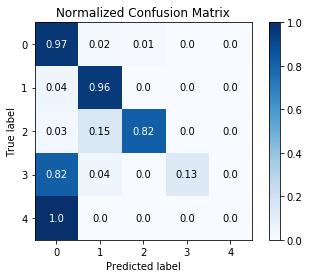

In [36]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

In [37]:
y_probas = model.predict_proba(X_test)

/home/master/rbg/local/lib/python2.7/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning:

overflow encountered in exp



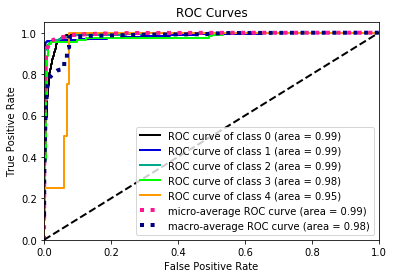

In [38]:
skplt.metrics.plot_roc(y_test, y_probas)

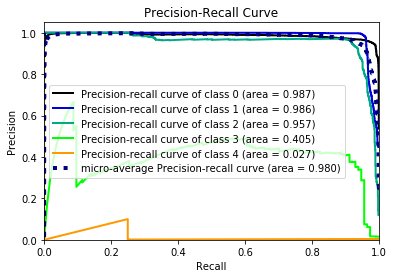

In [39]:
skplt.metrics.plot_precision_recall(y_test, y_probas)

In [40]:
# fit a Naive Bayes model to the data
print("-----------------------------------------NB---------------------------------")
model = GaussianNB()
model.fit(traindata, trainlabel)
print(model)
# make predictions
expected = testlabel
predicted = model.predict(testdata)

y_train1 = expected
y_pred = predicted
accuracy = accuracy_score(y_train1, y_pred)
recall = recall_score(y_train1, y_pred , average="weighted")
precision = precision_score(y_train1, y_pred , average="weighted")
f1 = f1_score(y_train1, y_pred, average="weighted")

print("accuracy")
print("%.3f" %accuracy)
print("precision")
print("%.3f" %precision)
print("racall")
print("%.3f" %recall)
print("f1score")
print("%.3f" %f1)

-----------------------------------------NB---------------------------------
GaussianNB(priors=None)
accuracy
0.587
precision
0.759
racall
0.587
f1score
0.586


In [41]:
# fit a k-nearest neighbor model to the data
print("-----------------------------------------KNN---------------------------------")
model = KNeighborsClassifier()
model.fit(traindata, trainlabel)
print(model)
# make predictions
expected = testlabel
predicted = model.predict(testdata)
# summarize the fit of the model

y_train1 = expected
y_pred = predicted
accuracy = accuracy_score(y_train1, y_pred)
recall = recall_score(y_train1, y_pred , average="weighted")
precision = precision_score(y_train1, y_pred , average="weighted")
f1 = f1_score(y_train1, y_pred, average="weighted")


print("----------------------------------------------")
print("accuracy")
print("%.3f" %accuracy)
print("precision")
print("%.3f" %precision)
print("racall")
print("%.3f" %recall)
print("f1score")
print("%.3f" %f1)

-----------------------------------------KNN---------------------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
----------------------------------------------
accuracy
0.981
precision
0.981
racall
0.981
f1score
0.981


In [42]:
print("-----------------------------------------DT---------------------------------")

model = DecisionTreeClassifier()
model.fit(traindata, trainlabel)
print(model)
# make predictions
expected = testlabel
predicted = model.predict(testdata)
# summarize the fit of the model

y_train1 = expected
y_pred = predicted
accuracy = accuracy_score(y_train1, y_pred)
recall = recall_score(y_train1, y_pred , average="weighted")
precision = precision_score(y_train1, y_pred , average="weighted")
f1 = f1_score(y_train1, y_pred, average="weighted")


print("----------------------------------------------")
print("accuracy")
print("%.3f" %accuracy)
print("precision")
print("%.3f" %precision)
print("racall")
print("%.3f" %recall)
print("f1score")
print("%.3f" %f1)

-----------------------------------------DT---------------------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
----------------------------------------------
accuracy
0.995
precision
0.995
racall
0.995
f1score
0.995


In [ ]:
print("-----------------------------------------Adaboost---------------------------------")

model = AdaBoostClassifier(n_estimators=100)
model.fit(traindata, trainlabel)

# make predictions
expected = testlabel
predicted = model.predict(testdata)
# summarize the fit of the model

y_train1 = expected
y_pred = predicted
accuracy = accuracy_score(y_train1, y_pred)
recall = recall_score(y_train1, y_pred , average="weighted")
precision = precision_score(y_train1, y_pred , average="weighted")
f1 = f1_score(y_train1, y_pred, average="weighted")


print("----------------------------------------------")
print("accuracy")
print("%.3f" %accuracy)
print("precision")
print("%.3f" %precision)
print("racall")
print("%.3f" %recall)
print("f1score")
print("%.3f" %f1)

In [ ]:
model = RandomForestClassifier(n_estimators=100)
model = model.fit(traindata, trainlabel)

# make predictions
expected = testlabel
predicted = model.predict(testdata)
# summarize the fit of the model

print("--------------------------------------RF--------------------------------------")

y_train1 = expected
y_pred = predicted
accuracy = accuracy_score(y_train1, y_pred)
recall = recall_score(y_train1, y_pred , average="weighted")
precision = precision_score(y_train1, y_pred , average="weighted")
f1 = f1_score(y_train1, y_pred, average="weighted")


print("----------------------------------------------")
print("accuracy")
print("%.3f" %accuracy)
print("precision")
print("%.3f" %precision)
print("racall")
print("%.3f" %recall)
print("f1score")
print("%.3f" %f1)

In [ ]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']
X_train = traindata
y_train = trainlabel
X_test = testdata
y_test = testlabel

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print("----------------------------------------------")
    print("cross-validation accuracy of train data set")
    print(means)
    
    print("----------------------------------------------")
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    #print("accuracy score")
    #print(accuracy_score(y_true, y_pred))
    print("confusion matrix")
    print(confusion_matrix(y_true, y_pred))
    print("Classification report")
    print(classification_report(y_true, y_pred))
    print()
    print("***************************************************************************")
    print("for now")
    print("accuracy score")
    print(accuracy_score(y_true, y_pred))
    print("precision")
    print(precision_score(y_true, y_pred , average="binary"))
    print("recall")
    print(recall_score(y_true, y_pred , average="binary"))
    print("F-score")
    print(f1_score(y_true, y_pred , average="binary"))
    print("best parameters")
    print(clf.best_params_)
    print("***************************************************************************")
    predicted = y_pred
    expected = y_true
    cm = metrics.confusion_matrix(expected, predicted)
    print("==============================================")
    print(cm)
    tpr = float(cm[0][0])/np.sum(cm[0])
    fpr = float(cm[1][1])/np.sum(cm[1])
    print("%.3f" %tpr)
    print("%.3f" %fpr)

In [43]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier()
model = model.fit(traindata, trainlabel)

# make predictions
expected = testlabel
predicted = model.predict(testdata)
# summarize the fit of the model

print("--------------------------------------RF--------------------------------------")

y_train1 = expected
y_pred = predicted
accuracy = accuracy_score(y_train1, y_pred)
recall = recall_score(y_train1, y_pred , average="weighted")
precision = precision_score(y_train1, y_pred , average="weighted")
f1 = f1_score(y_train1, y_pred, average="weighted")


print("----------------------------------------------")
print("accuracy")
print("%.3f" %accuracy)
print("precision")
print("%.3f" %precision)
print("racall")
print("%.3f" %recall)
print("f1score")
print("%.3f" %f1)

/home/master/rbg/local/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning:

max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.



--------------------------------------RF--------------------------------------
----------------------------------------------
accuracy
0.443
precision
0.745
racall
0.443
f1score
0.518


In [44]:
#Grid Search Hyperparameters

#Hyperparameter Optimization

#k-fold Cross Validation: k=5 or k=10 
#Please use seed during cross validation to produce reproduicable results.

In [45]:
X = traindata
Y = trainlabel

In [ ]:
# Case 1: Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import Normalizer
# Function to create model, required for KerasClassifier
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=122, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model


# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# Case 2: How to Tune the Training Optimization Algorithm
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import Normalizer
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=122, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model

#normalize the data
scaler = Normalizer().fit(X)
X = scaler.transform(X)

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# Case 3: Use scikit-learn to grid search the learning rate and momentum
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
from sklearn.preprocessing import Normalizer
# Function to create model, required for KerasClassifier
def create_model(learn_rate=0.01, momentum=0):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=122, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	optimizer = SGD(lr=learn_rate, momentum=momentum)
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# Case 4: Use scikit-learn to grid search the weight initialization
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import Normalizer
# Function to create model, required for KerasClassifier
def create_model(init_mode='uniform'):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=122, kernel_initializer=init_mode, activation='relu'))
	model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# Case 5: Use scikit-learn to grid search the activation function
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import Normalizer
# Function to create model, required for KerasClassifier
def create_model(activation='relu'):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=122, kernel_initializer='uniform', activation=activation))
	model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# Case 6: Use scikit-learn to grid search the dropout rate
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from sklearn.preprocessing import Normalizer
# Function to create model, required for KerasClassifier
def create_model(dropout_rate=0.0, weight_constraint=0):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=122, kernel_initializer='uniform', activation='linear', kernel_constraint=maxnorm(weight_constraint)))
	model.add(Dropout(dropout_rate))
	model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# Case 7: Use scikit-learn to grid search the number of neurons
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from sklearn.preprocessing import Normalizer
# Function to create model, required for KerasClassifier
def create_model(neurons=1):
	# create model
	model = Sequential()
	model.add(Dense(neurons, input_dim=122, kernel_initializer='uniform', activation='linear', kernel_constraint=maxnorm(4)))
	model.add(Dropout(0.2))
	model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))